In [1]:
import pandas as pd

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reference File
# Date File
dt_df = pd.read_csv('data/date.csv')
dt_df['from'] = pd.to_datetime(dt_df['from'])
dt_df['from_year'] = dt_df['from'].apply(lambda x: x.year)
dt_df['from_month'] = dt_df['from'].apply(lambda x: x.month)

dt_df['to'] = pd.to_datetime(dt_df['to'])
dt_df['to_year'] = dt_df['from'].apply(lambda x: x.year)
dt_df['to_month'] = dt_df['from'].apply(lambda x: x.month)

# Object File
obj_df = pd.read_csv('data/object.csv')
obj_df = obj_df.drop_duplicates()[['course_id', 'module_id', 'category', 'start']]
#obj_df['start'] = obj_df[obj_df['start'] != 'null']['start'].astype('datetime64')
obj_df['start'] = pd.to_datetime(obj_df[obj_df['start'] != 'null']['start'])

sample_sub_df = pd.read_csv('data/sampleSubmission.csv', header=None)

In [3]:
# Train
tr_enroll = pd.read_csv('data/train/enrollment_train.csv')
tr_log = pd.read_csv('data/train/log_train.csv')
tr_log['time'] = pd.to_datetime(tr_log['time'])
tr_log['action_date'] = tr_log.time.apply(lambda x: x.date())
tr_log['action_dow'] = tr_log['time'].apply(lambda x: x.weekday())
tr_truth = pd.read_csv('data/train/truth_train.csv', header=None)
    # Test
    te_enroll = pd.read_csv('data/test/enrollment_test.csv')
    te_log = pd.read_csv('data/test/log_test.csv')

In [4]:
"""
Join All Data files for Training
"""
print tr_log.shape
big_df = pd.merge(tr_enroll, tr_log, on='enrollment_id', how='left')
big_df = pd.merge(big_df, dt_df, on='course_id', how='left')
big_df = pd.merge(big_df, obj_df, left_on=['course_id', 'object'], right_on=['course_id', 'module_id'], how='left')
print big_df.shape

(8157277, 7)
(8157277, 18)


In [5]:
big_df['before_end'] = (big_df['to'] - big_df['time']).astype('m8[D]')
big_df['after_start'] = (big_df['time'] - big_df['from']).astype('m8[D]')
big_df['class_len'] = (big_df['to'] - big_df['from']).astype('m8[D]')
big_df['after_module_released'] = (big_df['time'] - big_df['start']).astype('m8[D]')

In [2]:
#pd.merge(enroll_df, log_df, on='enrollment_id', how='left')
tr_truth = pd.read_csv('data/train/truth_train.csv', header=None)
tr_truth

NameError: name 'pd' is not defined

In [7]:
def plot_daily_action(x):
    df = big_df[big_df['enrollment_id']==x][['source', 'event', 'time', 'action_date', 'before_end']].sort('time')
    print df.head()
    grp = df.groupby(['before_end','event'])
    print grp.count().loc(axis=0)[:,'access']['time']
    grp.count().loc(axis=0)[:,'access']['time'].plot()
    grp.count().loc(axis=0)[:,'navigate']['time'].plot()
    grp.count().loc(axis=0)[:,'page_close']['time'].plot()
    grp.count().loc(axis=0)[:,'problem']['time'].plot()

    source     event                time action_date  before_end
0   server  navigate 2014-06-14 09:38:29  2014-06-14          26
1   server    access 2014-06-14 09:38:39  2014-06-14          26
2   server    access 2014-06-14 09:38:39  2014-06-14          26
3   server    access 2014-06-14 09:38:48  2014-06-14          26
4  browser   problem 2014-06-14 09:41:49  2014-06-14          26
before_end  event 
-1          access    14
 0          access     2
 5          access     2
 6          access    16
 8          access    20
 9          access     8
 10         access     4
 13         access    21
 16         access     2
 18         access     3
 19         access     4
 21         access     8
 26         access     3
Name: time, dtype: int64


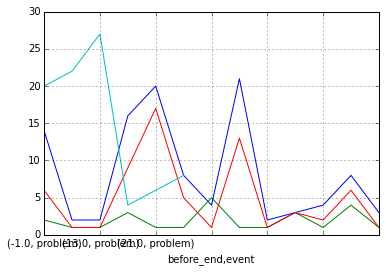

In [8]:
# Populat Server
plot_daily_action(1)

courses
1     57165
2     12958
3      4698
4      2029
5      1048
6       511
7       309
8       159
9        99
10       66
11       38
12       23
13       26
14       19
15       13
16        9
17        4
18        3
19        1
20        1
21        4
25        2
27        1
Name: courses, dtype: int64


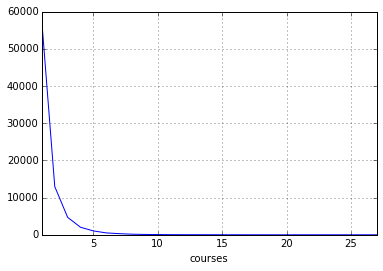

In [89]:
"""
Train: # course vs. # students
Findings:
    - 
"""
grouped = pd.DataFrame(tr_enroll.username.value_counts().tolist(), columns=['courses']).groupby('courses')
print grouped.courses.count()
grouped.courses.count().plot()

courses
1     45102
2      8605
3      2693
4      1002
5       464
6       225
7       106
8        67
9        48
10       28
11        6
12        5
13        8
14        4
17        1
Name: courses, dtype: int64


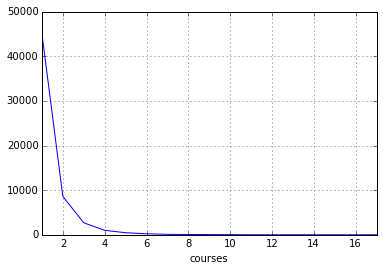

In [95]:
"""
Test: # course vs. # students
Findings:
    - 
"""
grouped = pd.DataFrame(te_enroll.username.value_counts().tolist(), columns=['courses']).groupby('courses')
print grouped.courses.count()
grouped.courses.count().plot()

In [18]:
big_df['after_start'].astype('m8[D]')

0           2
1           2
2           2
3           2
4           2
5           2
6           2
7           2
8           2
9           2
10          2
11          2
12          2
13          7
14          7
15          7
16          7
17          7
18          7
19          7
20          7
21          7
22          7
23          7
24          7
25          7
26          7
27          7
28          7
29          7
           ..
8157247    21
8157248    21
8157249    21
8157250    21
8157251    21
8157252    21
8157253    21
8157254    21
8157255    21
8157256    21
8157257    21
8157258    21
8157259    21
8157260    21
8157261    21
8157262    21
8157263    21
8157264    21
8157265    21
8157266    21
8157267    21
8157268    21
8157269    21
8157270    21
8157271    21
8157272    21
8157273    21
8157274    21
8157275    21
8157276    21
Name: after_start, dtype: float64

In [44]:
tr_log.head()['time'].apply(lambda x: x.year)
tr_log.head()['time'].apply(lambda x: x.month)

0    6
1    6
2    6
3    6
4    6
Name: time, dtype: int64

In [ ]:
pd.merge(tr_enroll, te_enroll, on=['course_id'], how='inner')

0    2014-06-14
1    2014-06-14
2    2014-06-14
3    2014-06-14
4    2014-06-14
Name: time, dtype: object

In [79]:
tr_truth

,0,1
0,1,0
1,3,0
2,4,0
3,5,0
4,6,0
5,7,1
6,9,1
7,12,0
8,13,0
9,14,1


In [19]:
print te_enroll.shape
print len(set(te_enroll.username.values.tolist()) & set(tr_enroll.username.values.tolist()))

(80362, 3)
25102


In [20]:
25102.0/80362 

0.3123615639232473

In [8]:
ans_df = pd.merge(tr_enroll, tr_truth, left_on='enrollment_id', right_on=0, how='left')
print len(set(te_enroll.username.values.tolist()) & set(ans_df[ans_df[1]==1].username.values.tolist()))

21791


In [9]:
21791.0/80362

0.2711604987431871

In [13]:
print len(set(te_enroll.course_id.values.tolist()))
print len(set(te_enroll.course_id.values.tolist()) & set(tr_enroll.course_id.values.tolist()))

39
39


In [17]:
len(set(tr_enroll.course_id.values.tolist()))

39